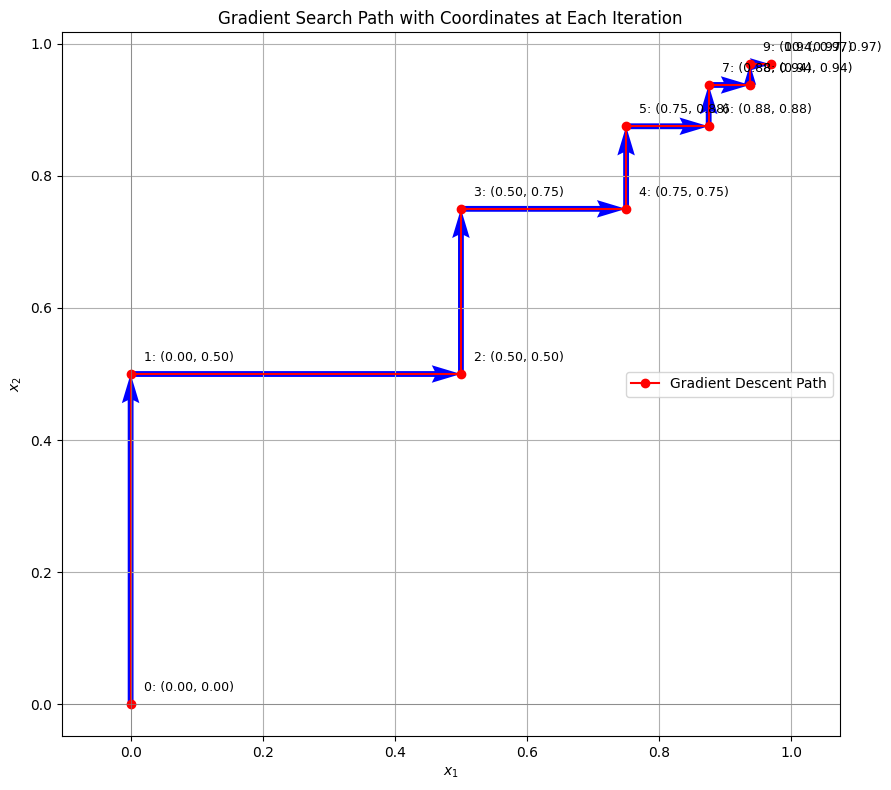

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify, solve

# Define symbolic variables
x1, x2, t = symbols('x1 x2 t')

# Define the objective function from your screenshot
f_expr = 2*x1*x2 + 2*x2 - x1**2 - 2*x2**2

# Compute the gradient
grad_x1 = diff(f_expr, x1)
grad_x2 = diff(f_expr, x2)

# Convert symbolic expressions to numerical functions
f_func = lambdify((x1, x2), f_expr, 'numpy')
grad_x1_func = lambdify((x1, x2), grad_x1, 'numpy')
grad_x2_func = lambdify((x1, x2), grad_x2, 'numpy')

# Initialize starting point
x_vals = [(0.0, 0.0)]
epsilon = 1e-3
max_iter = 10

# Run iterations
for _ in range(max_iter):
    xk = x_vals[-1]
    gx1 = grad_x1_func(*xk)
    gx2 = grad_x2_func(*xk)

    # Check stopping condition
    if abs(gx1) <= epsilon and abs(gx2) <= epsilon:
        break

    # x(t) = xk + t * grad
    x1_t = xk[0] + t * gx1
    x2_t = xk[1] + t * gx2
    f_t = f_expr.subs({x1: x1_t, x2: x2_t})
    dfdt = diff(f_t, t)

    # Solve for optimal t*
    t_star = solve(dfdt, t)
    t_star = [float(ts.evalf()) for ts in t_star if ts.is_real and ts >= 0]
    t_star = t_star[0] if t_star else 0.0

    # Update x
    new_x1 = xk[0] + t_star * gx1
    new_x2 = xk[1] + t_star * gx2
    x_vals.append((new_x1, new_x2))

# Extract values for plotting
x1_list, x2_list = zip(*x_vals)

# Plot movement on x1-x2 coordinate plane
plt.figure(figsize=(9, 8))
plt.plot(x1_list, x2_list, 'ro-', label='Gradient Descent Path')
plt.quiver(x1_list[:-1], x2_list[:-1],
           np.diff(x1_list), np.diff(x2_list),
           angles='xy', scale_units='xy', scale=1, color='blue')

# Annotate each iteration with coordinates
for i, (x, y) in enumerate(zip(x1_list, x2_list)):
    label = f'{i}: ({x:.2f}, {y:.2f})'
    plt.text(x + 0.02, y + 0.02, label, fontsize=9)

plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gradient Search Path with Coordinates at Each Iteration')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()